In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
import sys
import copy
import random
import pandas as pd
from bokeh.io import output_notebook

import xml.dom.minidom
import xml.etree.ElementTree as ET

sys.path.append('..')
from models.Fleet import Fleet, from_xml
output_notebook()

Loading BokehJS ...

In [4]:
file_path = '../data/GA_implementation_xml/35C_2CS_1D_3EV_1CAP/'
results_path = file_path+'24-05-2020_18-02-12_INFEASIBLE_ASSIGNED/'

fleet = from_xml(file_path+'35C_2CS_1D_3EV_1CAP_already_assigned.xml', assign_customers=True)

In [5]:
fleet_size = 3

routes = {}
for i in range(fleet_size):
    ev_file = results_path + f'EV{i}_operation.csv'
    df = pd.read_csv(ev_file)
    Sk = tuple(df['Sk'])
    Lk = tuple(df['Lk'])
    x1_0 = df['x1_reaching'].iloc[0]
    x2_0 = df['x2_reaching'].iloc[0]
    x3_0 = df['x3_reaching'].iloc[0]
    routes[i] = ((Sk, Lk), x1_0, x2_0, x3_0)

fleet.set_routes_of_vehicles(routes, include_ev_weight=False)
fleet.create_optimization_vector()
fleet.plot_operation()

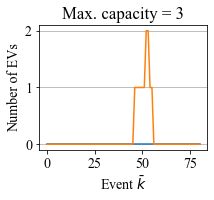

In [51]:
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = '14'
import matplotlib.pyplot as plt

folder = '../data/GA_implementation_xml/35C_2CS_1D_3EV_4CAP/'
folder_opt = '24-05-2020_02-43-13_FEASIBLE_ASSIGNATION/'
file_path = folder + folder_opt + 'nodes_occupation.csv'
fig_path = folder + folder_opt + 'occupation2.pdf'
df = pd.read_csv(file_path)
plot = df[['36', '37']].plot(yticks=[0,1,2], figsize=(3.2,3), legend=False)
plt.grid(axis='y')
plt.xlabel(r'Event $\bar{k}$')
plt.ylabel(r'Number of EVs')
plt.title('Max. capacity = 3')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(fig_path)